('Gilbert Arenas', 20.7, 5.3)
('James Harden', 21.4, 5.3)
('Damian Lillard', 21.9, 6.2)
('Russell Westbrook', 21.9, 7.7)
('Dave Bing*', 20.3, 6)
('Dwyane Wade', 23.5, 5.7)
('Lebron James', 25, 7.4)


შეიყვანეთ მოთამაშის სახელი:  Damian Lillard
წლები ლიგაში:  5
თამაშების რაოდენობა:  246
ნათამაშები წუთები:  7547
Field Goals:  433
Field Goal Attempts:  45347
სამქულიანები:  356
საჯარიმოები:  564
შეტ. მოხსნები:  654
სულ მოხსნები:  356
პასები:  3676
ჩაჭრები:  456
ბლოკები:  245
ბურთის დაკარგვები:  577
ჯარიმების რაოდენობა:  5467
ქულები:  3467
საშ. დრო:  33
საშ. ქულები:  21
საშ. მოხსნები:  4
საშ. პასები:  5
დაბადების თარიღი:  15-Jul-1990
ქალაქი:  Oakland
შტატი:  California
შეიყვანეთ მოთამაშის სახელი განახლებისთვის:  Lebron James
შეიყვანეთ ახალი საშუალო ქულა:  24
შეიყვანეთ მოთამაშის სახელი წასაშლელად:  Stephen Curry


805 142 13 2


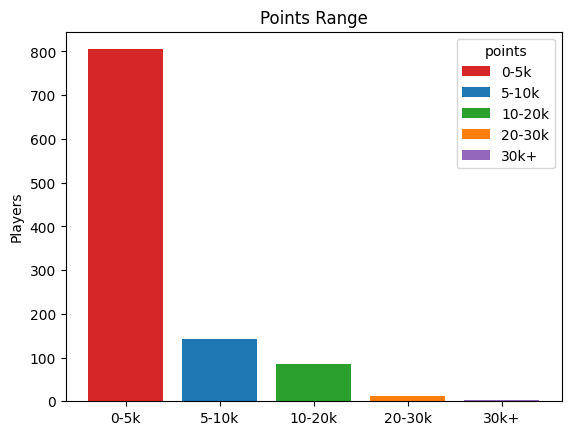

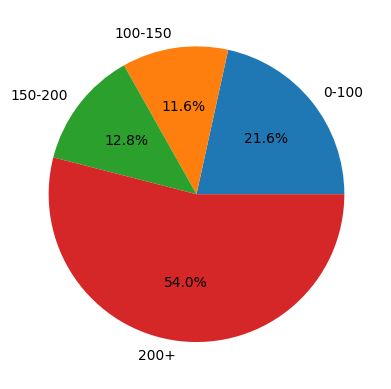

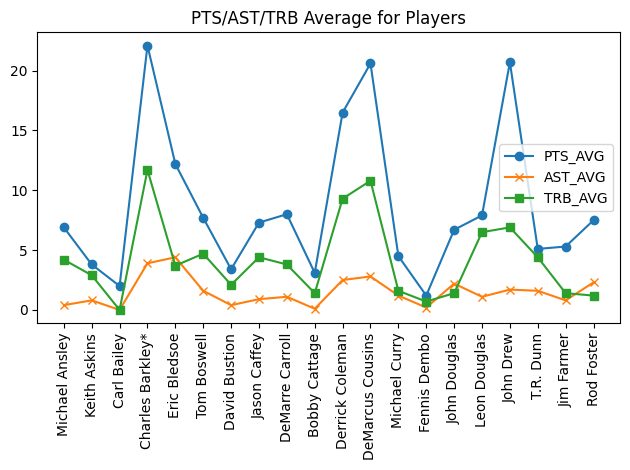

In [1]:
import sqlite3

conn = sqlite3.connect("nba.sqlite")
# conn.row_factory = sqlite3.Row
c = conn.cursor()


#გამოაქვს იმ მოთამაშეების სახელები, რომელთა საშალო ქულაც მეტია 20ზე, ხოლო ასისტების რაოდენობა მეტია 5ზე

c.execute("SELECT Player , PTS_AVG, AST_AVG FROM nba  WHERE PTS_AVG>20 AND AST_AVG>5")

results = c.fetchall()
for row in results:
    print(row)




#მოთამაშის დამატება
player = input("შეიყვანეთ მოთამაშის სახელი: ")
yrs = int(input("წლები ლიგაში: "))
g = int(input("თამაშების რაოდენობა: "))
mp = int(input("ნათამაშები წუთები: "))
fg = int(input("Field Goals: "))
fga = int(input("Field Goal Attempts: "))
three = int(input("სამქულიანები: "))
ft = int(input("საჯარიმოები: "))
orb = int(input("შეტ. მოხსნები: "))
trb = int(input("სულ მოხსნები: "))
ast = int(input("პასები: "))
stl = int(input("ჩაჭრები: "))
blk = int(input("ბლოკები: "))
tov = int(input("ბურთის დაკარგვები: "))
pf = int(input("ჯარიმების რაოდენობა: "))
pts = int(input("ქულები: "))
mp_avg = float(input("საშ. დრო: "))
pts_avg = float(input("საშ. ქულები: "))
trb_avg = float(input("საშ. მოხსნები: "))
ast_avg = float(input("საშ. პასები: "))
date = input("დაბადების თარიღი: ")
city = input("ქალაქი: ")
state = input("შტატი: ")

c.execute("""INSERT INTO nba VALUES
(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""", (player, yrs, g, mp, fg, fga, three, ft, orb, trb, ast, stl, blk, tov, pf, pts,
      mp_avg, pts_avg, trb_avg, ast_avg, date, city, state))
conn.commit()
#
# #ვამოწმებთ დაემატა თუ არა მოთამაშე
c.execute("SELECT * FROM nba WHERE Player='Lebron James'")
#
#
# #მოთამაშის საშუალო ქულის განახლება(მომხმარებელი შეიყვანს სასურველ მოთამაშეს, ხოლო შემდეგ შეიყვანს ახალ საშუალო ქულას)
player_name = input('შეიყვანეთ მოთამაშის სახელი განახლებისთვის: ')
new_pts_avg = float(input('შეიყვანეთ ახალი საშუალო ქულა: '))

c.execute("UPDATE nba SET PTS_AVG=? WHERE Player=?", (new_pts_avg,  player_name))
conn.commit()
#
#
# #სასურველი მოთამაშის წაშლა
player_n = input('შეიყვანეთ მოთამაშის სახელი წასაშლელად: ')

c.execute("DELETE FROM nba WHERE Player=?", (player_n,))
conn.commit()



#DIAGRAMA 1 გვიჩვენებს სვეტოვან დიაგრამას კალათბურთელების ქულების მიხედვით


def pts_stats(pts, limit):
    return c.execute("SELECT count(*) FROM nba WHERE PTS>=? AND PTS<=?", (pts,limit,)).fetchone()[0]
# def pts

f_0_to_5k = pts_stats(0,5000)
more_than_5k = pts_stats(5000,10000)
more_than_10k = pts_stats(10000, 20000)
more_than_20k = pts_stats(20000, 30000)
more_than_30k = pts_stats(30000,40000)
print(f_0_to_5k, more_than_5k, more_than_20k, more_than_30k)


import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ptss = ['0-5k', '5-10k', '10-20k', '20-30k', '30k+']
counts = [f_0_to_5k, more_than_5k, more_than_10k, more_than_20k, more_than_30k]
bar_labels = ['0-5k', '5-10k', '10-20k', '20-30k', '30k+']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

ax.bar(ptss, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Players')
ax.set_title('Points Range')
ax.legend(title='points')

plt.show()



#DIAGRAMA 2 ეს დიაგრამა გვიჩვენებს ბლოკების რაოდენობის მიხედვით პროცენტულობას
def blk_stats(blk, limit):
    return c.execute("SELECT count(*) FROM nba WHERE BLK>=? AND BLK<=?", (blk,limit,)).fetchone()[0]
def blk_stat(blk):
    return c.execute("SELECT count(*) FROM nba WHERE BLK>?", (blk,)).fetchone()[0]



c_gt50 = blk_stats(50,99)
c_gt100 = blk_stats(100, 149)
c_gt150 = blk_stats(150,200)
c_gt200 = blk_stat(200)
all = c_gt50 + c_gt100 + c_gt150 + c_gt200

def percentage(sum, part):
    return part/sum*100
# print(c_gt200)

p_gt50 = percentage(all, c_gt50)
p_gt100 = percentage(all, c_gt100)
p_gt150 = percentage(all, c_gt150)
p_gt200 = percentage(all, c_gt200)




import matplotlib.pyplot as plt

labels = '0-100', '100-150', '150-200', '200+'
sizes = [p_gt50, p_gt100, p_gt150, p_gt200]

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()


#DIAGRAMA 3 მოცემული დიაგრამა გვაჩვენებს 20 მოთამაშის საშუალო ქულებს, ასისტებსა და რებაუნდებს

c.execute("SELECT Player, PTS_AVG, AST_AVG, TRB_AVG FROM nba LIMIT 20")
rows = c.fetchall()
players = [row[0] for row in rows]
pts_avg = [row[1] for row in rows]
ast_avg = [row[2] for row in rows]
trb_avg = [row[3] for row in rows]

plt.plot(players, pts_avg, label='PTS_AVG', marker='o')
plt.plot(players, ast_avg, label='AST_AVG', marker='x')
plt.plot(players, trb_avg, label='TRB_AVG', marker='s')
plt.xticks(rotation=90)
plt.legend()
plt.title("PTS/AST/TRB Average for Players")
plt.tight_layout()
plt.show()





conn.commit()
conn.close()